**IMPORT NECESSARY LIBRARIES**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv('/home/jerome/Documents/CSV FILE/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**to check for duplicates**

In [10]:
df.duplicated().sum()

np.int64(0)

**to check the distribution of the dataset**

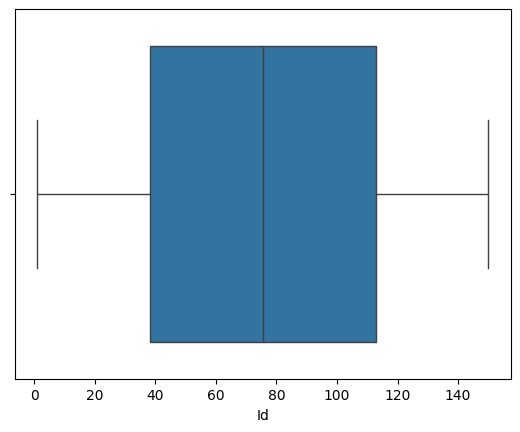

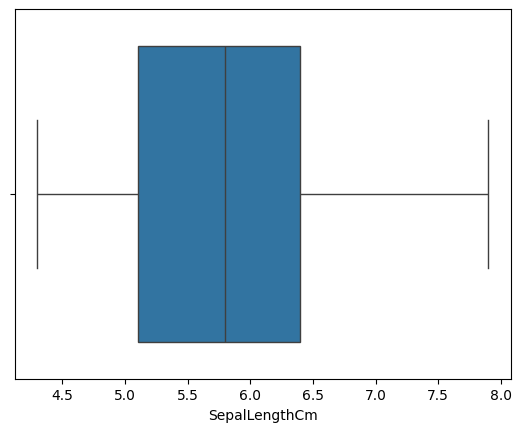

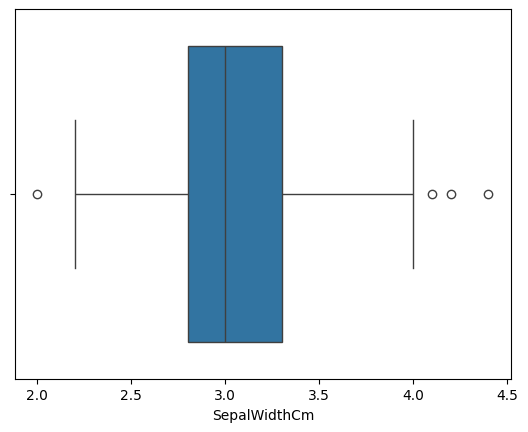

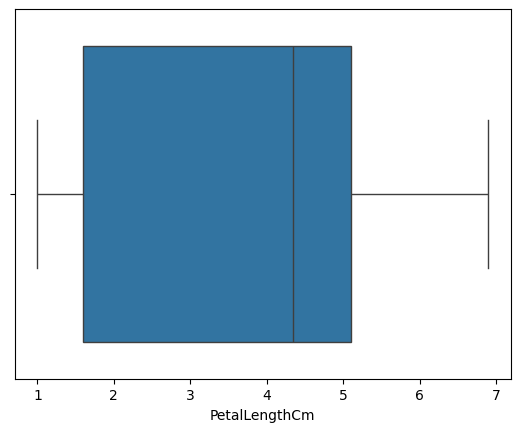

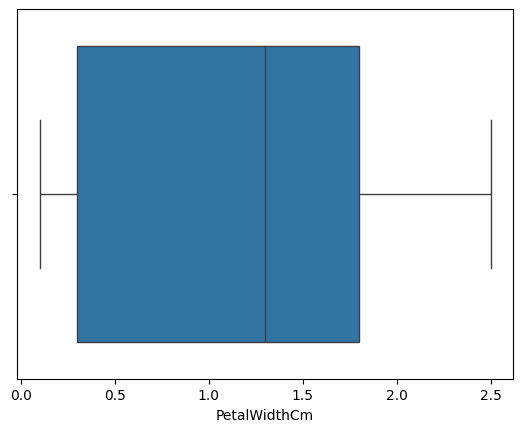

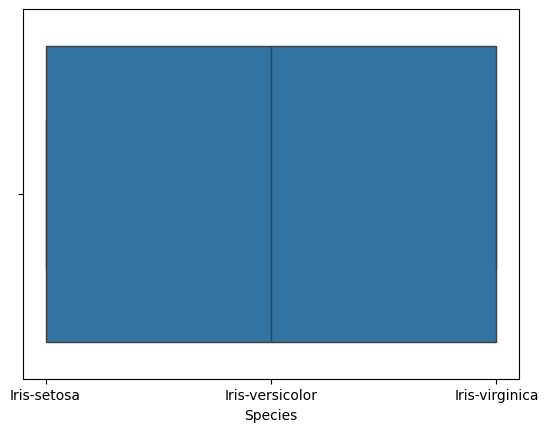

In [11]:
for col in df:
    sns.boxplot(data=df, x=df[col])
    plt.show()

In [12]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

**encoding catgorical data**

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

**Drop 'id' column**

In [14]:
df.drop('Id', axis=1,inplace=True)

**Split data into training and testing**

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV

y=df['Species']
X=df.drop('Species', axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.25, random_state=26)

**Train the model**

In [16]:
ss=StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [17]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', random_state=26)
grid = {
    'C':[1,2,3,4,5],
    'gamma' : [0.001, 0.01, 0.1, 1]
}

search = GridSearchCV(model, param_grid=grid, cv=6, scoring = 'f1_macro')
search.fit(X_train,y_train)
print(search.best_params_)
print(search.best_score_)

{'C': 2, 'gamma': 0.1}
0.9638662263662264


In [18]:
model = search.best_estimator_
pred = model.predict(X_test)
from sklearn.metrics import accuracy_score as acs, classification_report as cr, confusion_matrix, ConfusionMatrixDisplay
print(acs(y_test, pred))
print('\n')
print(cr(y_test, pred))

0.9736842105263158


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.92      0.96        12
           2       0.93      1.00      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



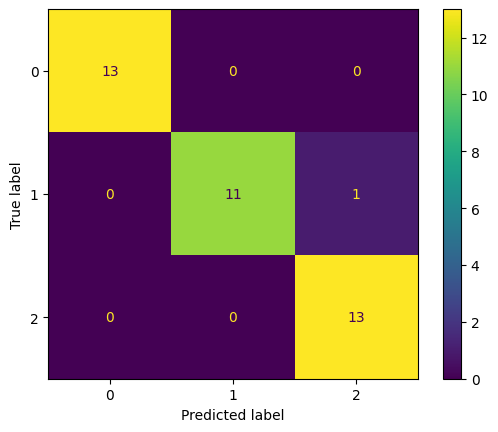

In [19]:
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

**In this matrix, the model correctly predicted all 13 samples of class 0, all 13 samples of class 2, and 11 out of 12 samples of class 1. Only one sample of class 1 was misclassified as class 2. The rest of the predictions are correct. This suggests that the model performs very well overall, with just one error out of 38 predictions. The diagonal values show the correct predictions, while the off-diagonal value (the single 1 in row 1, column 2) indicates the only misclassification.**
